In [88]:
import pandas as pd
df = pd.read_csv('actor_data_for_regression.csv')
df = df.drop(df.columns[0], axis=1)


In [89]:


import seaborn as sns
import matplotlib.pyplot as plt



df = pd.get_dummies(df,columns = ['Gender', 'Birth Region'])
df.head()



,Actor name,Height,Ethnicity,Age at First Release,Success Score,University,Theater,Sports,Birth City,Citizenship,...,Specialised Drama School,Specialised Acting School,Specialised Dance School,Specialised Arts School,Gender_F,Gender_M,Birth Region_Europe,Birth Region_Rest of World,Birth Region_USA,Birth Region_United Kingdom
0,Denzel Washington,1.84,African Americans,26.0,10.000000,Specialised Drama School,True,Basketball,Mount Vernon New York US,NaN,...,1,0,0,0,0,1,0,0,1,0
1,Matt Damon,1.78,Scandinavian Americans,18.0,9.912690,Harvard University,True,No Sports,Cambridge Massachusetts US,NaN,...,0,0,0,0,0,1,0,0,1,0
2,Tom Hanks,1.83,Portuguese Americans,27.0,9.741555,sub 1500 school,True,No Sports,Concord California US,"United States, Greece1",...,0,0,0,0,0,1,0,0,1,0
3,Eddie Murphy,1.75,African Americans,21.0,9.415060,Did not go,False,No Sports,New York City US,NaN,...,0,0,0,0,0,1,0,0,1,0
4,Tom Cruise,1.70,White people,18.0,9.362255,Did not go,False,Football,Syracuse New York US,NaN,...,0,0,0,0,0,1,0,0,1,0


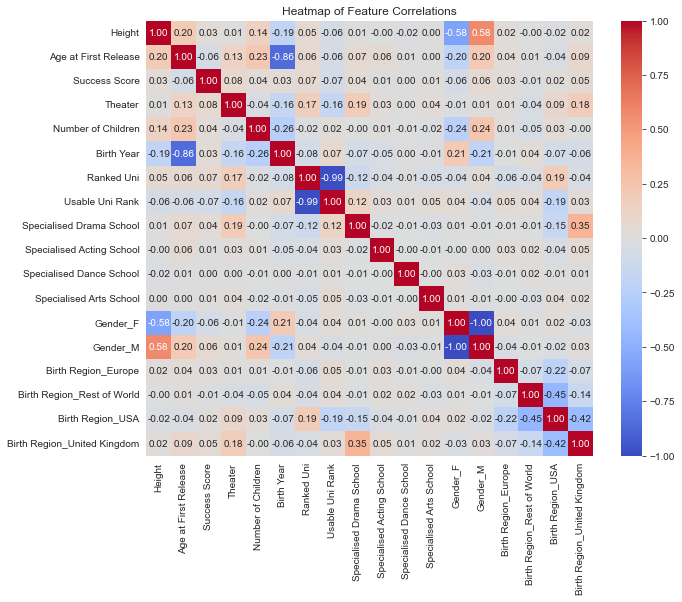

In [90]:

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Feature Correlations')
plt.show()



In [91]:

## Correlation of Sucess score with other features
corr = df.corr()
corr_success = corr['Success Score']
corr_success = corr_success.sort_values(ascending=False)
corr_success = corr_success.drop('Success Score')
corr_success




Theater                        0.077313
Ranked Uni                     0.069311
Gender_M                       0.063564
Birth Region_United Kingdom    0.049881
Specialised Drama School       0.041544
Number of Children             0.037632
Birth Year                     0.034940
Height                         0.033699
Birth Region_Europe            0.025267
Birth Region_USA               0.020762
Specialised Arts School        0.008708
Specialised Acting School      0.006557
Specialised Dance School       0.003729
Birth Region_Rest of World    -0.013165
Age at First Release          -0.057925
Gender_F                      -0.063564
Usable Uni Rank               -0.071318
Name: Success Score, dtype: float64

In [108]:


##print different ethnicities

df = pd.read_csv('actor_data_for_regression.csv')
df = df.drop(df.columns[0], axis=1)


df.head()



,Actor name,Gender,Height,Ethnicity,Age at First Release,Success Score,University,Theater,Sports,Birth City,...,Birth Year,Birth Month,QS University Rank,Ranked Uni,Usable Uni Rank,Specialised Drama School,Specialised Acting School,Specialised Dance School,Specialised Arts School,Birth Region
0,Denzel Washington,M,1.84,African Americans,26.0,10.000000,Specialised Drama School,True,Basketball,Mount Vernon New York US,...,1954.0,December,Not Ranked,0,3000,1,0,0,0,USA
1,Matt Damon,M,1.78,Scandinavian Americans,18.0,9.912690,Harvard University,True,No Sports,Cambridge Massachusetts US,...,1970.0,October,4,1,4,0,0,0,0,USA
2,Tom Hanks,M,1.83,Portuguese Americans,27.0,9.741555,sub 1500 school,True,No Sports,Concord California US,...,1956.0,July,Not Ranked,0,3000,0,0,0,0,USA
3,Eddie Murphy,M,1.75,African Americans,21.0,9.415060,Did not go,False,No Sports,New York City US,...,1961.0,April,Not Ranked,0,3000,0,0,0,0,USA
4,Tom Cruise,M,1.70,White people,18.0,9.362255,Did not go,False,Football,Syracuse New York US,...,1962.0,July,Not Ranked,0,3000,0,0,0,0,USA


In [109]:
ethnicity_mapping = {
    # African Descent
    'African Americans': 'African Descent',
    'Afro-Asians': 'African Descent',
    'Afro-Guyanese': 'African Descent',
    'Nigerian Americans': 'African Descent',
    'Somalis': 'African Descent',
    'Black Canadians': 'African Descent',
    'Black Britons': 'African Descent',
    'Haitian Americans': 'African Descent',
    'Sudanese Arabs': 'African Descent',
    'Ghanaian': 'African Descent',
    'Black Irish': 'African Descent',
    'Afro-Cuban': 'African Descent',
    'Yoruba people': 'African Descent',
    'Ghanaian Americans': 'African Descent',
    'Black people': 'African Descent',
    'Bahamian Americans': 'African Descent',
    'South African Americans': 'African Descent',

    
    # European Descent
    'Scandinavian Americans': 'European Descent',
    'Portuguese Americans': 'European Descent',
    'German Americans': 'European Descent',
    'Swedish Americans': 'European Descent',
    'Italian Americans': 'European Descent',
    'Irish Americans': 'European Descent',
    'English Americans': 'European Descent',
    'Scottish Americans': 'European Descent',
    'Austrians': 'European Descent',
    'Scottish people': 'European Descent',
    'Irish people': 'European Descent',
    'English people': 'European Descent',
    'White people': 'European Descent',
    'White Americans': 'European Descent',
    'Italians': 'European Descent',
    'Slovak Americans': 'European Descent',
    'Lithuanian Americans': 'European Descent',
    'Anglo-Irish people': 'European Descent',
    'Swedes': 'European Descent',
    'Albanian Americans': 'European Descent',
    'British': 'European Descent',
    'Russian Americans': 'European Descent',
    'Irish migration to Great Britain': 'European Descent',
    'Serbian Americans': 'European Descent',
    'British Americans': 'European Descent',
    'Polish Americans': 'European Descent',
    'French Americans': 'European Descent',
    'Welsh people': 'European Descent',
    'Scotch-Irish Americans': 'European Descent',
    'Dutch Americans': 'European Descent',
    'Greek Canadians': 'European Descent',
    'Irish Australians': 'European Descent',
    'Spaniards': 'European Descent',
    'French': 'European Descent',
    'Germans': 'European Descent',
    'Romani people': 'European Descent',
    'Baltic Russians': 'European Descent',
    'French Canadians': 'European Descent',
    'Catalans': 'European Descent',
    'Czech Americans': 'European Descent',
    'European Americans': 'European Descent',
    'Croatian Americans': 'European Descent',
    'Swedish Canadians': 'European Descent',
    'White British': 'European Descent',
    'Serbian Canadians': 'European Descent',
    'British Jamaicans': 'European Descent',
    'Argentines': 'European Descent',
    'Dutch Australian': 'European Descent',
    'Colombian Americans': 'European Descent',  # Mixed Hispanic/Latino + European
    'Poles': 'European Descent',
    'Russian Canadians': 'European Descent',
    'Rusyn American': 'European Descent',
    'Dutch Canadians': 'European Descent',
    'Polish Australians': 'European Descent',
    'Italian Australians': 'European Descent',
    'Austrians in the United Kingdom': 'European Descent',
    'Bulgarian Canadians': 'European Descent',
    'French Chilean': 'European Descent',
    'German Canadians': 'European Descent',
    'Corsicans': 'European Descent',
    'Sicilian Americans': 'European Descent',
    'Swiss': 'European Descent',
    'Dutch': 'European Descent',
    'English Australians': 'European Descent',
    'Irish Canadians': 'European Descent',
    'Icelanders': 'European Descent',
    'Anglo-Celtic Australians': 'European Descent',
    'Slovene Americans': 'European Descent',
    'Croatian Australians': 'European Descent',
    'British Asians': 'European Descent',
    'British Chinese': 'European Descent',
    'Greek Americans': 'European Descent',
    'Norwegian Americans': 'European Descent',
    'Croats': 'European Descent',
    'Italian Canadians': 'European Descent',
    'Russians': 'European Descent',
    'Hungarian Americans': 'European Descent',
    'Serbs of Croatia': 'European Descent',
    'Welsh Americans': 'European Descent',
    'Spanish Americans': 'European Descent',
    'Danish Americans': 'European Descent',
    'Danes': 'European Descent',
    'Scottish Canadians': 'European Descent',
    'Ukrainian Americans': 'European Descent',
    'Czechs': 'European Descent',
    'Romanian Americans': 'European Descent',
    'Americans': 'European Descent',

    
    # Jewish Descent
    'Jewish people': 'Jewish Descent',
    'American Jews': 'Jewish Descent',
    'Ashkenazi Jews': 'Jewish Descent',
    'Sephardi Jews': 'Jewish Descent',
    'African-American Jews': 'Jewish Descent',
    'British Jews': 'Jewish Descent',
    'Israeli Americans': 'Jewish Descent',
    'Mizrahi Jews': 'Jewish Descent',
    'History of the Jews in Morocco': 'Jewish Descent',
    'Israelis': 'Jewish Descent',

    
    # Indigenous Descent
    'Cajun': 'Indigenous Peoples',
    'Cherokee': 'Indigenous Peoples',
    'Māori': 'Indigenous Peoples',
    'Apache': 'Indigenous Peoples',
    'Mohawk': 'Indigenous Peoples',
    'Ojibwe': 'Indigenous Peoples',
    'Choctaw': 'Indigenous Peoples',
    'Lumbee': 'Indigenous Peoples',
    'First Nations': 'Indigenous Peoples',
    'Inuit': 'Indigenous Peoples',
    'Iñupiaq people': 'Indigenous Peoples',
    'Cree': 'Indigenous Peoples',
    'Native Americans in the United States': 'Indigenous Peoples',
    'Blackfoot Confederacy': 'Indigenous Peoples',
    'Native Hawaiians': 'Indigenous Peoples',
    'Indigenous peoples of the Americas': 'Indigenous Peoples',

    
    # Australian Descent
    'Australians': 'Oceanic Descent',
    'Australian Americans': 'Oceanic Descent',
    'Samoan Americans': 'Oceanic Descent',
    'Kiwi': 'Oceanic Descent',



    # Asian Descent
    'Hongkongers': 'Asian Descent',
    'Japanese Americans': 'Asian Descent',
    'Indians': 'Asian Descent',
    'Chinese Americans': 'Asian Descent',
    'Hmong Americans': 'Asian Descent',
    'Taiwanese Americans': 'Asian Descent',
    'Taiwanese people': 'Asian Descent',
    'Cambodian Americans': 'Asian Descent',
    'Indonesian Americans': 'Asian Descent',
    'Vietnamese Americans': 'Asian Descent',
    'Bengali': 'Asian Descent',
    'Punjabi diaspora': 'Asian Descent',
    'Gujarati people': 'Asian Descent',
    'Filipino mestizo': 'Asian Descent',
    'Filipino people': 'Asian Descent',
    'Indian Americans': 'Asian Descent',
    'Syrian Americans': 'Asian Descent',  # Middle Eastern, but often grouped under broader Asian categories
    'Japanese people': 'Asian Descent',
    'Koreans': 'Asian Descent',
    'Korean Americans': 'Asian Descent',
    'Asian Americans': 'Asian Descent',
    'Asian people': 'Asian Descent',
    'Chinese Canadians': 'Asian Descent',
    'Chinese Singaporeans': 'Asian Descent',
    'Malaysian Chinese': 'Asian Descent',
    'Tamil Americans': 'Asian Descent',

    
    # Hispanic/Latino Descent
    'Hispanic and Latino Americans': 'Hispanic/Latino Descent',
    'Stateside Puerto Ricans': 'Hispanic/Latino Descent',
    'Cuban Americans': 'Hispanic/Latino Descent',
    'Mexicans': 'Hispanic/Latino Descent',
    'Mexican Americans': 'Hispanic/Latino Descent',
    'Dominican Americans': 'Hispanic/Latino Descent',
    'Venezuelans': 'Hispanic/Latino Descent',
    'Ecuadorian Americans': 'Hispanic/Latino Descent',
    'Salvadoran Americans': 'Hispanic/Latino Descent',
    'Colombians': 'Hispanic/Latino Descent',
    'Bolivian Americans': 'Hispanic/Latino Descent',
    'Spanish people of Filipino ancestry': 'Hispanic/Latino Descent',
    'Puerto Ricans': 'Hispanic/Latino Descent',
    'Criollo people': 'Hispanic/Latino Descent',
    'Brazilian Americans': 'Hispanic/Latino Descent',
    'Hispanics': 'Hispanic/Latino Descent',

    
    # Mixed or Multiracial
    'multiracial Americans': 'Mixed/Multiracial',
    'Afro Trinidadians and Tobagonians': 'Mixed/Multiracial',
    'multiracial people': 'Mixed/Multiracial',
    'Indo Caribbeans': 'Mixed/Multiracial',
    'Louisiana Creole people': 'Mixed/Multiracial',
    'Eurasian': 'Mixed/Multiracial',
    'White Africans of European ancestry': 'Mixed/Multiracial',
    

    # Middle Eastern and North African (MENA) Descent
    'Arab Americans': 'Middle Eastern/North African Descent',
    'Lebanese Americans': 'Middle Eastern/North African Descent',
    'Moroccan Americans': 'Middle Eastern/North African Descent',
    'Arabs in Bulgaria': 'Middle Eastern/North African Descent',
    'Pathani': 'Middle Eastern/North African Descent',
    'Dinka people': 'Middle Eastern/North African Descent',
    'Turkish Americans': 'Middle Eastern/North African Descent',
    'Iranian peoples': 'Middle Eastern/North African Descent',
    'مسح': 'Middle Eastern/North African Descent',
    
}



df.Ethnicity = df.Ethnicity.map(ethnicity_mapping)

In [110]:
print(df.Ethnicity.value_counts())
df.head()



European Descent                        1257
African Descent                          458
Jewish Descent                           359
Asian Descent                            121
Hispanic/Latino Descent                   89
Indigenous Peoples                        53
Oceanic Descent                           21
Mixed/Multiracial                         16
Middle Eastern/North African Descent      11
Name: Ethnicity, dtype: int64


,Actor name,Gender,Height,Ethnicity,Age at First Release,Success Score,University,Theater,Sports,Birth City,...,Birth Year,Birth Month,QS University Rank,Ranked Uni,Usable Uni Rank,Specialised Drama School,Specialised Acting School,Specialised Dance School,Specialised Arts School,Birth Region
0,Denzel Washington,M,1.84,African Descent,26.0,10.000000,Specialised Drama School,True,Basketball,Mount Vernon New York US,...,1954.0,December,Not Ranked,0,3000,1,0,0,0,USA
1,Matt Damon,M,1.78,European Descent,18.0,9.912690,Harvard University,True,No Sports,Cambridge Massachusetts US,...,1970.0,October,4,1,4,0,0,0,0,USA
2,Tom Hanks,M,1.83,European Descent,27.0,9.741555,sub 1500 school,True,No Sports,Concord California US,...,1956.0,July,Not Ranked,0,3000,0,0,0,0,USA
3,Eddie Murphy,M,1.75,African Descent,21.0,9.415060,Did not go,False,No Sports,New York City US,...,1961.0,April,Not Ranked,0,3000,0,0,0,0,USA
4,Tom Cruise,M,1.70,European Descent,18.0,9.362255,Did not go,False,Football,Syracuse New York US,...,1962.0,July,Not Ranked,0,3000,0,0,0,0,USA


In [111]:

## Print num of rows with undefined
print(df.shape)


(6539, 22)


In [112]:

df = df.dropna(subset=['Ethnicity'])
print(df.shape)

print(df.Ethnicity.unique())




(2385, 22)
['African Descent' 'European Descent' 'Jewish Descent' 'Oceanic Descent'
 'Indigenous Peoples' 'Asian Descent'
 'Middle Eastern/North African Descent' 'Hispanic/Latino Descent'
 'Mixed/Multiracial']


In [113]:
df = pd.get_dummies(df,columns = ['Gender', 'Birth Region', 'Ethnicity'])


In [114]:
corr = df.corr()
corr_success = corr['Success Score']
corr_success = corr_success.sort_values(ascending=False)
corr_success = corr_success.drop('Success Score')
corr_success


Gender_M                                          0.076059
Number of Children                                0.068866
Theater                                           0.060592
Ethnicity_European Descent                        0.059123
Ranked Uni                                        0.050445
Specialised Drama School                          0.047545
Ethnicity_Oceanic Descent                         0.036844
Birth Year                                        0.034632
Birth Region_United Kingdom                       0.025685
Ethnicity_Hispanic/Latino Descent                 0.023053
Height                                            0.022048
Birth Region_USA                                  0.021148
Specialised Dance School                          0.013745
Ethnicity_Mixed/Multiracial                       0.012066
Specialised Acting School                         0.005357
Birth Region_Europe                               0.002803
Ethnicity_Middle Eastern/North African Descent   -0.0036

In [115]:
df.head()

,Actor name,Height,Age at First Release,Success Score,University,Theater,Sports,Birth City,Citizenship,Number of Children,...,Birth Region_United Kingdom,Ethnicity_African Descent,Ethnicity_Asian Descent,Ethnicity_European Descent,Ethnicity_Hispanic/Latino Descent,Ethnicity_Indigenous Peoples,Ethnicity_Jewish Descent,Ethnicity_Middle Eastern/North African Descent,Ethnicity_Mixed/Multiracial,Ethnicity_Oceanic Descent
0,Denzel Washington,1.84,26.0,10.000000,Specialised Drama School,True,Basketball,Mount Vernon New York US,NaN,4.0,...,0,1,0,0,0,0,0,0,0,0
1,Matt Damon,1.78,18.0,9.912690,Harvard University,True,No Sports,Cambridge Massachusetts US,NaN,4.0,...,0,0,0,1,0,0,0,0,0,0
2,Tom Hanks,1.83,27.0,9.741555,sub 1500 school,True,No Sports,Concord California US,"United States, Greece1",4.0,...,0,0,0,1,0,0,0,0,0,0
3,Eddie Murphy,1.75,21.0,9.415060,Did not go,False,No Sports,New York City US,NaN,10.0,...,0,1,0,0,0,0,0,0,0,0
4,Tom Cruise,1.70,18.0,9.362255,Did not go,False,Football,Syracuse New York US,NaN,3.0,...,0,0,0,1,0,0,0,0,0,0
